# Homework 4: New Topic
## Nave and Bacon - April 22, 2021
### New topic exploration: Sentiment Analysis using Natural Language Toolkit (NLTK)

Tutorial Link: https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk

In [ ]:
# import libraries
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
import seaborn as sns
import pandas as pd

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Tokenization

In [ ]:
# import 'sentence' and 'word' tokenization packages
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

text="""Hello Mr. Smith, how are you doing today? The weather is great, and city is awesome.
The sky is pinkish-blue. You shouldn't eat cardboard"""

# Paragraph -> Sentence Tokenization
tokenized_text=sent_tokenize(text)
print("Sentence Tokenization")
print(tokenized_text)
print()

# Sentence -> Word Tokenization
print("Word Tokenization")
tokenized_word=word_tokenize(text)
print(tokenized_word)

Sentence Tokenization
['Hello Mr. Smith, how are you doing today?', 'The weather is great, and city is awesome.', 'The sky is pinkish-blue.', "You shouldn't eat cardboard"]

Word Tokenization
['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard']


<FreqDist with 25 samples and 30 outcomes>

most common words: [('is', 3), (',', 2), ('The', 2), ('.', 2), ('Hello', 1)]



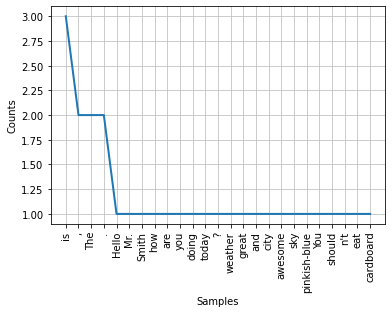

In [ ]:
# Frequency of Tokenized Words
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)
print()

print("most common words:", fdist.most_common(5))
print()

import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

Stop Words

In [ ]:
# importing list of stop words
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'other', 'mustn', "shan't", "she's", 'couldn', 'down', 'these', 'few', 'off', 'by', 'hasn', "mustn't", 'against', 'aren', 'doesn', 'theirs', 'am', "doesn't", 'a', 'from', 'she', "wouldn't", 'doing', 'until', 'no', 't', 'did', 'you', 'how', 'shan', 'what', 'only', "isn't", 'nor', 'be', 'wasn', 'shouldn', "haven't", "shouldn't", 'after', 'at', 'again', 'there', 'both', "you'd", 'out', 'as', 'further', 'had', 'very', 'ain', 'each', 'just', "couldn't", 'if', 'while', 'don', 're', 'so', 'he', 'didn', 'ourselves', 'of', 'when', 'their', 'himself', 'this', 'such', 'more', "you've", 'hers', 'our', 'in', 'some', 'was', 'yourselves', 'isn', 'then', 'above', 'yourself', 'wouldn', 'which', 'themselves', 'because', 'most', 'during', 'into', 'about', 'your', 'y', 'won', 'now', 'whom', 'mightn', 'we', 'my', 'to', "mightn't", 'an', 'here', 'than', 'having', 'me', 'do', "you're", "weren't", 'myself', 'o', "it's", 'that', 've', 'or', 'under', 'own', 'll', "won't", 'haven', 'ours', 'it', 'been', 'is', '

In [ ]:
# removing stop words from tokenized_word

filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Sentence:",tokenized_word)
print("Filtered Sentence:",filtered_sent)

Tokenized Sentence: ['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard']
Filtered Sentence: ['Hello', 'Mr.', 'Smith', ',', 'today', '?', 'The', 'weather', 'great', ',', 'city', 'awesome', '.', 'The', 'sky', 'pinkish-blue', '.', 'You', "n't", 'eat', 'cardboard']


Lexicon Normalization

In [ ]:
# Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['Hello', 'Mr.', 'Smith', ',', 'today', '?', 'The', 'weather', 'great', ',', 'city', 'awesome', '.', 'The', 'sky', 'pinkish-blue', '.', 'You', "n't", 'eat', 'cardboard']
Stemmed Sentence: ['hello', 'mr.', 'smith', ',', 'today', '?', 'the', 'weather', 'great', ',', 'citi', 'awesom', '.', 'the', 'sky', 'pinkish-blu', '.', 'you', "n't", 'eat', 'cardboard']


In [ ]:
# Lemmatization

from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
stem = PorterStemmer()

word = "flying"
print("Lemmatized Word:",lem.lemmatize(word,"v"))
print("Stemmed Word:",stem.stem(word))

Lemmatized Word: fly
Stemmed Word: fli


Part-of-Speech (POS) Tagging

In [ ]:
sent = "Albert Einstein was born in Ulm, Germany in 1879."
tokens=nltk.word_tokenize(sent)
print(tokens)
print()

print("Part-of-Speech Tagging")
nltk.pos_tag(tokens)

['Albert', 'Einstein', 'was', 'born', 'in', 'Ulm', ',', 'Germany', 'in', '1879', '.']

Part-of-Speech Tagging


[('Albert', 'NNP'),
 ('Einstein', 'NNP'),
 ('was', 'VBD'),
 ('born', 'VBN'),
 ('in', 'IN'),
 ('Ulm', 'NNP'),
 (',', ','),
 ('Germany', 'NNP'),
 ('in', 'IN'),
 ('1879', 'CD'),
 ('.', '.')]

Sentiment Analysis

In [ ]:
# ...Using Text Classification
data=pd.read_csv('train.tsv', sep='\t')
data.head(10)


,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [ ]:
data.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

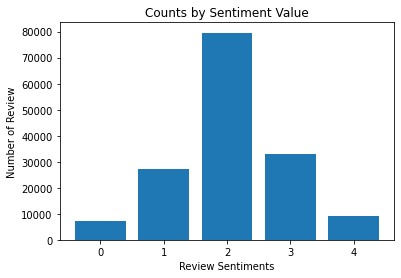

In [ ]:
Sentiment_count=data.groupby('Sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['Phrase'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.title("Counts by Sentiment Value")
plt.show()

Model Building: Bag-of-Words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

# tokenizer to remove unwanted elements
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(data['Phrase'])

# splitting data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, data['Sentiment'], test_size=0.3, random_state=1)

from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy (Bag-of-Words):",metrics.accuracy_score(y_test, predicted))
print()

# Bag of Words Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))

MultinomialNB Accuracy (Bag-of-Words): 0.6049169122986885

              precision    recall  f1-score   support

           0       0.43      0.27      0.33      2119
           1       0.49      0.41      0.45      8277
           2       0.68      0.78      0.73     23816
           3       0.52      0.50      0.51      9936
           4       0.46      0.29      0.36      2670

    accuracy                           0.60     46818
   macro avg       0.52      0.45      0.47     46818
weighted avg       0.59      0.60      0.59     46818



In [ ]:
# Checking for overfitting...
predicted_train= clf.predict(X_train)
print("MultinomialNB Accuracy (Bag-of-Words):",metrics.accuracy_score(y_train, predicted_train))

MultinomialNB Accuracy (Bag-of-Words): 0.6750059500924552


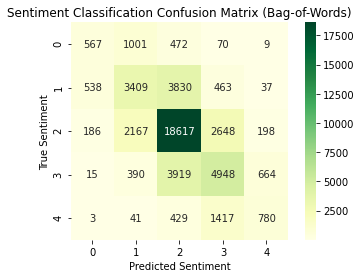

In [ ]:
# Bag of Words Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted)
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap="YlGn",
                    xticklabels=clf.classes_,
                    yticklabels=clf.classes_)

plt.xlabel('Predicted Sentiment');
plt.ylabel('True Sentiment')
plt.title('Sentiment Classification Confusion Matrix (Bag-of-Words)')
plt.show()

Model Building: TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(data['Phrase'])

# splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, data['Sentiment'], test_size=0.3, random_state=123)

# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy (TF-IDF):",metrics.accuracy_score(y_test, predicted))
print()

# TF-IDF Classification Report
print(classification_report(y_test, predicted))

MultinomialNB Accuracy (TF-IDF): 0.5865265496176684

              precision    recall  f1-score   support

           0       0.60      0.03      0.06      2110
           1       0.51      0.25      0.33      8081
           2       0.60      0.90      0.72     23920
           3       0.53      0.38      0.45      9929
           4       0.60      0.05      0.09      2778

    accuracy                           0.59     46818
   macro avg       0.57      0.32      0.33     46818
weighted avg       0.57      0.59      0.53     46818



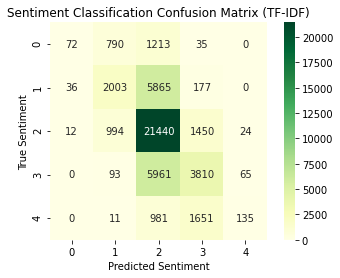

In [ ]:
# TF-IDF Confusion Matrix
cm = confusion_matrix(y_test, predicted)
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap="YlGn",
                    xticklabels=clf.classes_,
                    yticklabels=clf.classes_)

plt.xlabel('Predicted Sentiment');
plt.ylabel('True Sentiment')
plt.title('Sentiment Classification Confusion Matrix (TF-IDF)')
plt.show()

In [ ]:
# Checking for overfitting...
predicted_train = clf.predict(X_train)
print("MultinomialNB Accuracy (TF-IDF):",metrics.accuracy_score(y_train, predicted_train))
print()

MultinomialNB Accuracy (TF-IDF): 0.6320188206001355



##Questions

### Question 1

Create your own paragraph and tokenize it using the code from the beginning of the tutorial. Create a visualization to display the top 5 most frequently used words. What do these results tell you about the importance of removing stopwords?

In [ ]:
# Question 1

paragraph = """I love data mining. It is fun to build models to classify data and discover new patterns. 
              These discoveries allow us to use data to solve problems in innovative and exciting ways."""
tokenized_text2=sent_tokenize(paragraph)
print(tokenized_text2)

['I love data mining.', 'It is fun to build models to classify data and discover new patterns.', 'These discoveries allow us to use data to solve problems in innovative and exciting ways.']


<FreqDist with 25 samples and 30 outcomes>


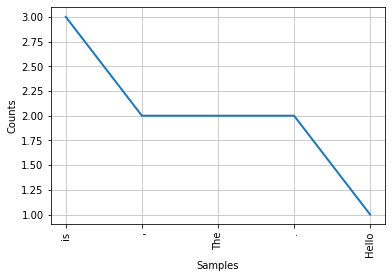

In [ ]:
# creating visualization
fdist = FreqDist(tokenized_word)
print(fdist)

fdist.plot(5,cumulative=False)
plt.show()

The importance of removing stopwords:

In this paragraph, four out of the five most frequent words were stopwords or punctuation marks. Therefore, if we want to perform meaningful sentiment analyses, our results will be seriously affected by stopwords. By removing these parts before training our models, we allow our models to focus on the words and phrases that we are interested in rather than useless words.

### Question 2

**Perform POS Tagging on your paragraph, and create a visualization of counts based on part of speech.**

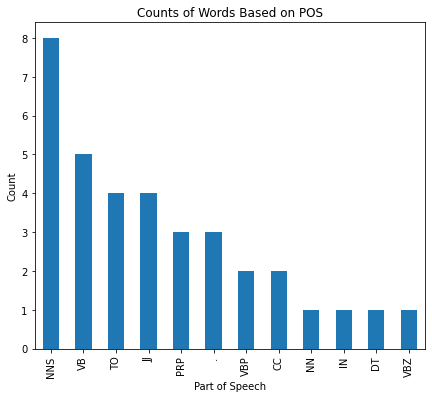

In [ ]:
# tokenization
myTokens=nltk.word_tokenize(paragraph)

# create visualization
values = nltk.pos_tag(myTokens)
df = pd.DataFrame(values, columns=['word','POS'])

df['POS'].value_counts().plot(kind='bar', figsize=(7, 6))
plt.xlabel('Part of Speech')
plt.ylabel('Count')
plt.title('Counts of Words Based on POS')
plt.show()





The words with the most counts based on the part of speech is NNS with 8, VB with 5, JJ with 4, and TO with 4.

### Question 3

**For the movie data, create confusion matrices and classification reports for the two models (Bag-of-words and TF-IDF). Compare the results and provide two observations.**

The Confusion Matrices and Classification Reports for both models are included above. 

Observation 1: Neither model was able to predict the sentiment value with a particularly high accuracy. The Bag of Words model reported an accuracy of 0.6049 (0.605) for the test data and the TF-IDF model had an accuracy of 0.5865 (0.587). 

Observation 2: The two models also performed similarly in terms of which sentiments they identified correctly and which ones they identified incorrectly. Both models seemed to correctly identify a large number of ratings with a sentiment value of 2 (Bag or words model was sligtly better), which makes sense because this category had the largest number of ratings overall. 

Observation 3: The models were fairly similar in terms of precision values for the five categories, but the TF-IDF Model performed better. However, the Bag of Words Model performed significantly better in terms of recall, reporting higher values in all but one category.

### Question 4

**Is the bag-of-words model overfitting to the training data? What evidence do you have to support your answer?**

The code to check for overfitting for the B-O-W model is above...

There is evidence to suggest that the Bag of Words model is overfitting to the training data. The model predicts the sentiment values of the training data with an accuracy of 0.675. For the test data, the accuracy falls to 0.6049 (0.605). This drop shows that there might be some slight overfitting but nothing major.

### Question 5

**Is the TF-IDF model overfitting to the training data? What evidence do you have to support your answer?**

The code to check for overfitting for the TF-IDF model is above...

Between the training and the test data, the accuracy for the TF-IDF model drops from 0.632 to 0.5865 (0.587). The model performs better on the training data, but the difference is slight enough so that there are no real concerns about overfitting.

### Challenge

**The two sentiment analysis models that we created above allow us to predict sentiments of our test data after fitting the model to training data. The sentiments themselves already existed as a column in the dataset. What if we have text that does not have any sentiment score to begin with? We can use the textBlob package to assign ‘polarity’ and ‘subjectivity/objectivity’ values to a sentence. Write two sentences about data mining, one positive and one negative and perform sentiment analysis using the textBlob package. Comment on how well the analysis captures your sentiment. The code to get you started is below…**

Code Source: https://stackabuse.com/sentiment-analysis-in-python-with-textblob/

In [ ]:
# Skeleton code

from textblob import TextBlob

# Preparing an input sentence
sentence = '''The platform provides universal access to the world's best education, partnering with top universities and organizations to offer courses online.'''

# Creating a textblob object and assigning the sentiment property
analysis = TextBlob(sentence).sentiment
print(analysis)


Sentiment(polarity=0.5, subjectivity=0.26666666666666666)


In [ ]:
from textblob import TextBlob

# Preparing an input sentence
positive = '''I love data mining because it is fantastic, cool, and exciting.'''
negative = '''I hate data mining because it is boring, useless, and stupid.'''

# Creating a textblob object and assigning the sentiment property
pos_analysis = TextBlob(positive).sentiment
print(pos_analysis)

neg_analysis = TextBlob(negative).sentiment
print(neg_analysis)


Sentiment(polarity=0.3875, subjectivity=0.7375)
Sentiment(polarity=-0.7749999999999999, subjectivity=0.775)


Observations:

Both analyses were spot on in terms of subjectivity. They identified each sentence with a subjectivity of over 0.7 (high), which is accurate because both sentences were pretty subjective. It also gave them similar scores, which makes sense because we just swapped out a few words to make the sentence positive or negative.

The analyses were also correct in terms of polarity. Our positive sentence was identified as positive and our negative sentence was identified as negative. It is interesting that our negative sentence was more extreme than our positive sentence (higher absolute value). It must label the words in our negative sentence as more polarizing than those from the positive sentence.